# **HEMA DARSHINI R - 22MIS0123**

# **BASE CODE — Grover (single iteration)**

In [1]:
!pip install qiskit qiskit-aer matplotlib -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.5 MB/s eta 0:00:00


In [2]:
!pip install qiskit qiskit-aer

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt
import numpy as np

# ✅ Guaranteed working histogram (never blank)
def plot_counts(counts, title="Histogram"):
    labels = sorted(counts.keys())
    values = [counts[k] for k in labels]

    plt.figure(figsize=(6,4))
    plt.bar(range(len(labels)), values)
    plt.xticks(range(len(labels)), labels)
    plt.xlabel("Measured Output")
    plt.ylabel("Counts")
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.show()


In [3]:
def oracle(qc, n, marked_state):
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)

    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)


def diffuser(qc, n):
    qc.h(range(n))
    qc.x(range(n))

    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)

    qc.x(range(n))
    qc.h(range(n))


In [4]:
def run(qc, shots=1024, title="Result"):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    result = sim.run(tqc, shots=shots).result()
    counts = result.get_counts()
    plot_counts(counts, title)
    print("Counts:", counts)


     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


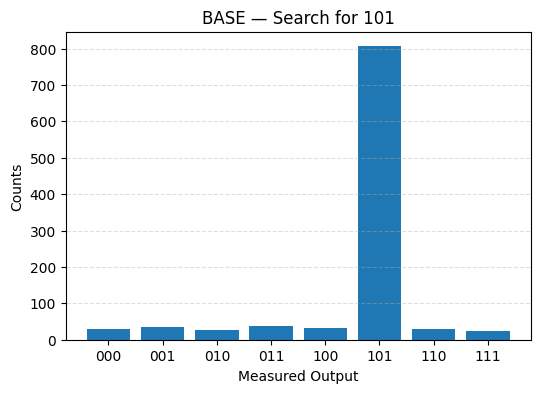

Counts: {'011': 39, '111': 25, '110': 29, '001': 34, '100': 33, '000': 30, '010': 28, '101': 806}


In [5]:
def grover_3qubit(marked_state="101"):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)

    qc.h(range(n))  # initialization
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

qc = grover_3qubit("101")
print(qc.draw())
run(qc, title="BASE — Search for 101")


# **TASK 1: Change Marked State**




Searching for: 111


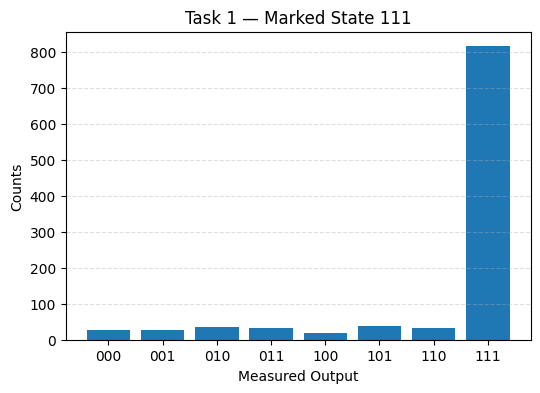

Counts: {'101': 37, '110': 32, '000': 26, '010': 36, '100': 18, '001': 27, '011': 33, '111': 815}

Searching for: 010


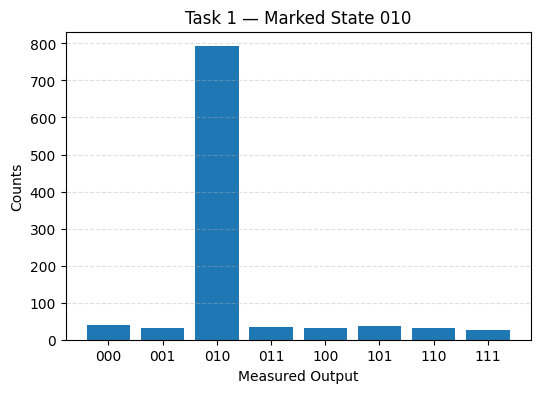

Counts: {'101': 38, '100': 31, '001': 32, '011': 34, '111': 26, '110': 32, '000': 39, '010': 792}


In [6]:
for state in ["111", "010"]:
    print("\nSearching for:", state)
    qc = grover_3qubit(state)
    run(qc, title=f"Task 1 — Marked State {state}")


# **Task 2: TASK 2: Extend to 4 Qubits**

     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐         
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├─────────
     ├───┤       │  ├───┤├───┤            │  ├───┤├───┤     └╥┘┌─┐      
q_1: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├──────╫─┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤      ║ └╥┘┌─┐   
q_2: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫──╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║  ║ └╥┘┌─┐
q_3: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║  ║ └╥┘
c: 4/════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                             0  1  2  3 


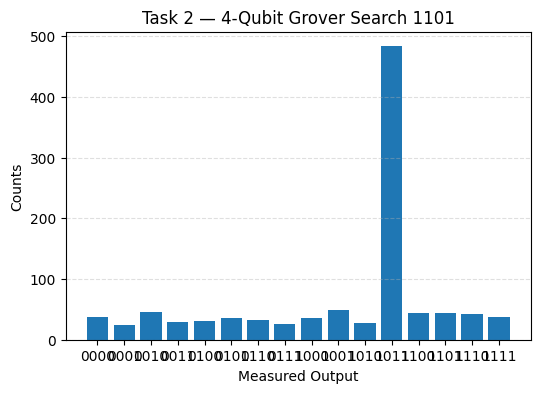

Counts: {'1111': 37, '1011': 483, '0111': 26, '0011': 30, '0010': 45, '0000': 38, '0101': 35, '1001': 49, '1100': 44, '0100': 31, '1000': 36, '0110': 32, '1101': 44, '1010': 28, '0001': 24, '1110': 42}


In [7]:
def grover_4qubit(marked_state="1101"):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)

    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

qc = grover_4qubit("1101")
print(qc.draw())
run(qc, title="Task 2 — 4-Qubit Grover Search 1101")


# **TASK 3: Multiple Grover Iterations (for stronger probability)**

     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐»
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├»
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤»
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├»
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤»
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├»
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
c: 3/══════════════════════════════════════════════════════════════════════»
                                                                           »
«     ┌───┐               ┌───┐┌───┐               ┌───┐┌───┐               »
«q_0: ┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├┤ X ├────────────■──»
«     ├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  »
«q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────

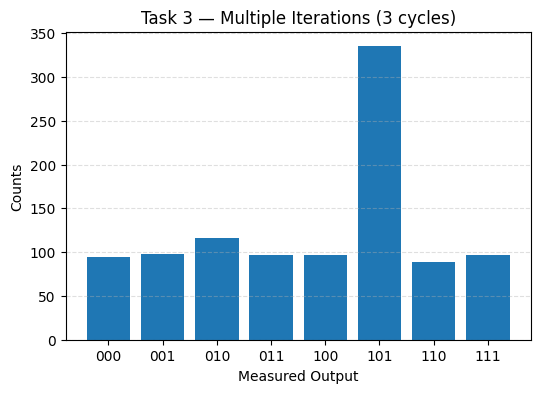

Counts: {'110': 89, '011': 97, '111': 97, '101': 335, '100': 97, '001': 98, '000': 95, '010': 116}


In [8]:
def grover_iterations(marked_state="101", iterations=2):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)

    qc.h(range(n))

    for _ in range(iterations):
        oracle(qc, n, marked_state)
        diffuser(qc, n)

    qc.measure(range(n), range(n))
    return qc

qc = grover_iterations("101", iterations=3)
print(qc.draw())
run(qc, title="Task 3 — Multiple Iterations (3 cycles)")


# **Task 4: Circuit Visualization (mpl)**

In [10]:
# Grover's Algorithm Implementation in Qiskit

%matplotlib inline

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# --- Oracle: marks the target state ---
def oracle(qc, n, marked_state):
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

# --- Diffuser: amplifies the probability of the marked state ---
def diffuser(qc, n):
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

# --- Main Grover Search Function ---
def grover_search(marked_state):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n)[::-1])
    return qc

# --- Run Grover ---
marked_state = "101"   # The state we want to find
qc = grover_search(marked_state)

# Try to draw circuit using mpl, else fallback to text
try:
    from pylatexenc import latexencode
    display(qc.draw("mpl"))
except Exception as e:
    print("Matplotlib drawer not available — using text output instead.")
    print(qc.draw("text"))

# --- Simulation ---
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=2048).result()

counts = result.get_counts()
print("\nCounts =", counts)

# --- Plot Result ---
plot_histogram(counts)
plt.show()


Matplotlib drawer not available — using text output instead.
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             2  1  0 

Counts = {'001': 64, '100': 56, '110': 78, '010': 64, '000': 71, '111': 56, '011': 67, '101': 1592}


# **Task 5: Add Noise (Aer NoiseModel)**

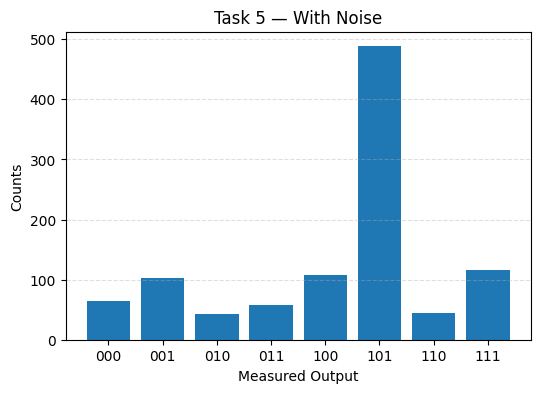

Counts: {'110': 45, '010': 43, '000': 65, '001': 103, '101': 488, '011': 57, '111': 116, '100': 107}


In [11]:
from qiskit_aer.noise import NoiseModel, depolarizing_error

def run_with_noise(qc):
    noise = NoiseModel()
    noise.add_all_qubit_quantum_error(depolarizing_error(0.05, 1), ['h','x'])
    noise.add_all_qubit_quantum_error(depolarizing_error(0.10, 2), ['mcx'])

    sim = AerSimulator(noise_model=noise)
    tqc = transpile(qc, sim)

    result = sim.run(tqc, shots=1024).result()
    counts = result.get_counts()

    plot_counts(counts, "Task 5 — With Noise")
    print("Counts:", counts)

qc = grover_3qubit("101")
run_with_noise(qc)


# **Task 6: Real Hardware Execution (Optional)**


🔹 Grover’s Algorithm Quantum Circuit:
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             2  1  0 

Counts (Ideal): {'011': 70, '111': 54, '110': 74, '010': 57, '000': 48, '001': 77, '100': 70, '101': 1598}
Counts (Low Noise 1%): {'100': 138, '010': 115, '000': 123, '110': 104, '111': 129, '011': 127, '101': 1159, '001': 153}
Counts (Medium Noise 3%): {'110': 173, '100': 209, '001': 249, '101': 661, '111': 216, '011': 174, '000

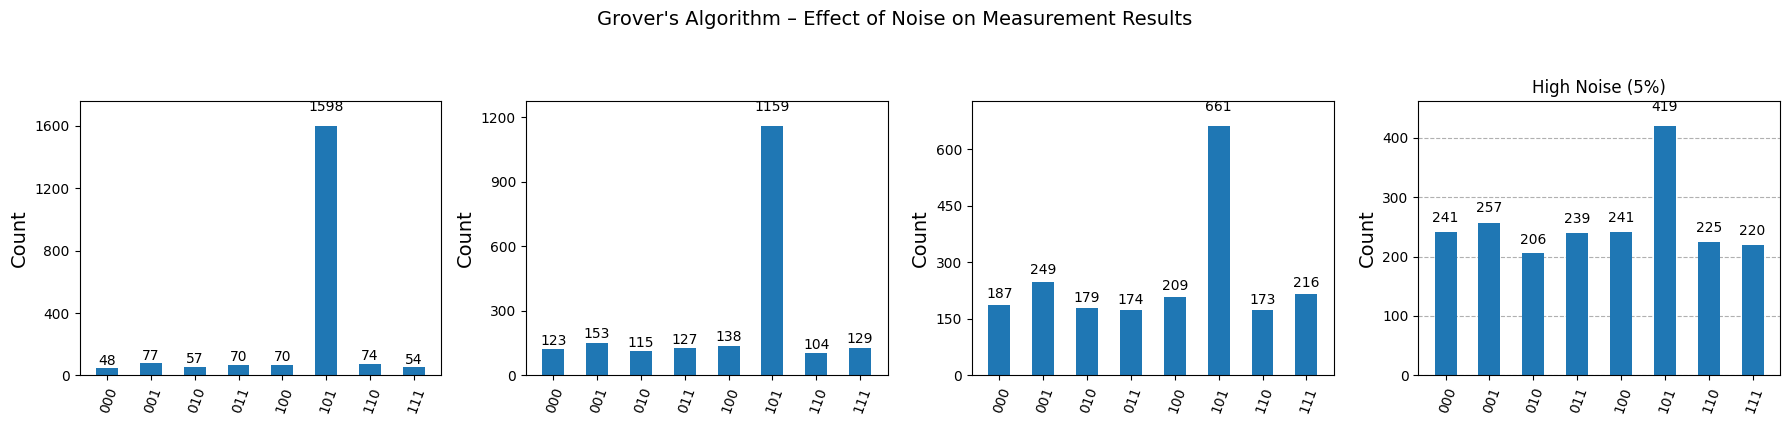

In [16]:
%matplotlib inline

# --- Imports ---
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel, depolarizing_error
import matplotlib.pyplot as plt


# --- Oracle: marks the target state ---
def oracle(qc, n, marked_state):
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)


# --- Diffuser: amplifies the probability of the marked state ---
def diffuser(qc, n):
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))


# --- Main Grover Search Function ---
def grover_search(marked_state):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n)[::-1])
    return qc


# --- Helper: Run Simulation with Given Noise ---
def run_with_noise(qc, noise_level=0.0):
    if noise_level == 0:
        sim = AerSimulator()
        compiled = transpile(qc, sim)
        result = sim.run(compiled, shots=2048).result()
        return result.get_counts()
    else:
        noise_model = NoiseModel()
        noise_model.add_all_qubit_quantum_error(depolarizing_error(noise_level, 1), ['x', 'h'])
        noise_model.add_all_qubit_quantum_error(depolarizing_error(noise_level * 2.5, 2), ['cx'])
        sim_noisy = AerSimulator(noise_model=noise_model)
        compiled_noisy = transpile(qc, sim_noisy)
        result_noisy = sim_noisy.run(compiled_noisy, shots=2048).result()
        return result_noisy.get_counts()


# --- Step 1: Build Grover circuit ---
marked_state = "101"
qc = grover_search(marked_state)

# --- Step 2: Visualize the quantum circuit ---
print("🔹 Grover’s Algorithm Quantum Circuit:")
try:
    from pylatexenc import latexencode
    display(qc.draw("mpl"))
except Exception:
    print(qc.draw("text"))

# --- Step 3: Run with different noise levels ---
counts_ideal = run_with_noise(qc, noise_level=0.0)
counts_low = run_with_noise(qc, noise_level=0.01)
counts_med = run_with_noise(qc, noise_level=0.03)
counts_high = run_with_noise(qc, noise_level=0.05)

# --- Step 4: Print measurement results ---
print("\nCounts (Ideal):", counts_ideal)
print("Counts (Low Noise 1%):", counts_low)
print("Counts (Medium Noise 3%):", counts_med)
print("Counts (High Noise 5%):", counts_high)

# --- Step 5: Plot separate histograms side by side ---
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

plot_histogram(counts_ideal, ax=axs[0], title="Ideal (0% Noise)")
plot_histogram(counts_low, ax=axs[1], title="Low Noise (1%)")
plot_histogram(counts_med, ax=axs[2], title="Medium Noise (3%)")
plot_histogram(counts_high, ax=axs[3], title="High Noise (5%)")

plt.suptitle("Grover's Algorithm – Effect of Noise on Measurement Results", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()
